In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
def samples_from_multivariate_multimodal_gaussian(mus: list | np.ndarray, covs: list | np.ndarray, N_samples: int = 100) -> np.ndarray:

    # set up distribution

    N_dims = len(mus[0])
    N_modes = len(mus)

    mixtures = [scipy.stats.multivariate_normal(mus[i], covs[i]) for i in range(N_modes)]

    # generate samples

    pick_mode = np.random.choice(N_modes, N_samples)
    N_samples_per_mode = [sum(pick_mode == i) for i in range(N_modes)]

    samples_per_mode = [mixtures[i].rvs(N_samples_per_mode[i]) for i in range(N_modes)]
    samples = np.concatenate(samples_per_mode)
    np.random.shuffle(samples)

    return samples

In [3]:
mu_down, mu_up = np.split(np.linspace(0,10,12),2)

In [4]:
mu_up

array([ 5.45454545,  6.36363636,  7.27272727,  8.18181818,  9.09090909,
       10.        ])

In [5]:
mu_down

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455])

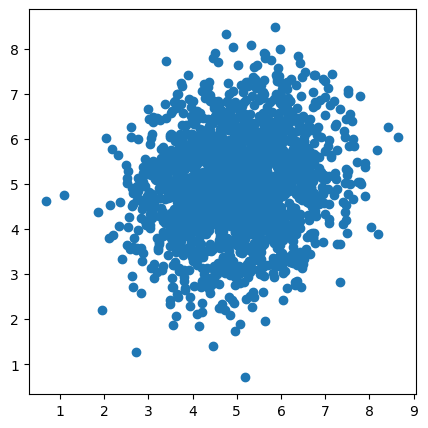

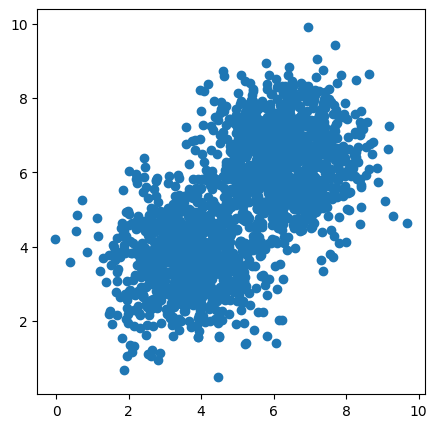

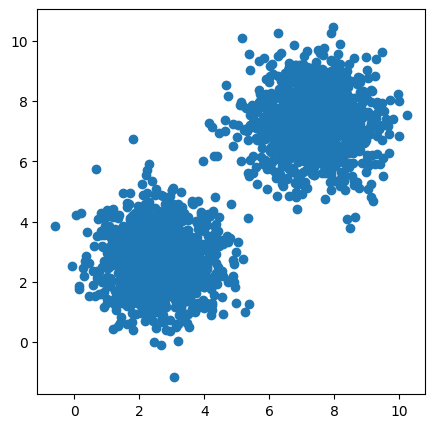

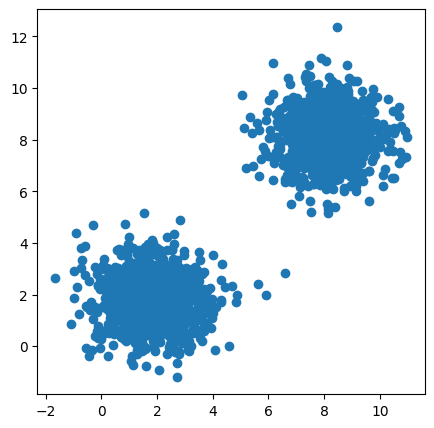

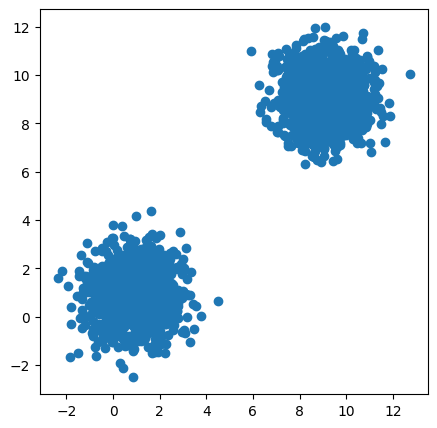

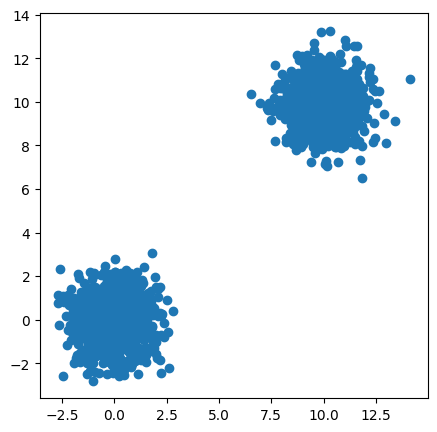

In [6]:
N_samples=3000
N_plt = 2000
covs = [np.eye(2), np.eye(2)]
corrs = []
for m_u, m_d in zip(mu_up,mu_down[::-1]):
    mus = [[m_u]*2,[m_d]*2]
    samples = samples_from_multivariate_multimodal_gaussian(mus, covs, N_samples)
    plt.figure(figsize=(5,5))
    plt.scatter(samples[:N_plt,0],samples[:N_plt,1])
    corrs.append(np.corrcoef(samples[:,0],samples[:,1]))

In [7]:
corrs

[array([[1.       , 0.1713891],
        [0.1713891, 1.       ]]),
 array([[1.        , 0.64242408],
        [0.64242408, 1.        ]]),
 array([[1.        , 0.84012547],
        [0.84012547, 1.        ]]),
 array([[1.        , 0.90997089],
        [0.90997089, 1.        ]]),
 array([[1.        , 0.94305922],
        [0.94305922, 1.        ]]),
 array([[1.        , 0.96179892],
        [0.96179892, 1.        ]])]

In [8]:
min_pt, mid_pt, max_pt = 1., 10., 20.
n_dists = 15
mus1 = np.linspace(mid_pt,max_pt,n_dists)
mus1 = list(zip(mus1,np.full(len(mus1), max_pt)))

In [9]:
mus1

[(10.0, 20.0),
 (10.714285714285714, 20.0),
 (11.428571428571429, 20.0),
 (12.142857142857142, 20.0),
 (12.857142857142858, 20.0),
 (13.571428571428571, 20.0),
 (14.285714285714285, 20.0),
 (15.0, 20.0),
 (15.714285714285715, 20.0),
 (16.42857142857143, 20.0),
 (17.142857142857142, 20.0),
 (17.857142857142858, 20.0),
 (18.57142857142857, 20.0),
 (19.285714285714285, 20.0),
 (20.0, 20.0)]

In [10]:
mus2 = np.linspace(mid_pt,min_pt,n_dists)
mus2 = list(zip(mus2,np.full(len(mus2), max_pt)))

In [11]:
mus2

[(10.0, 20.0),
 (9.357142857142858, 20.0),
 (8.714285714285714, 20.0),
 (8.071428571428571, 20.0),
 (7.428571428571429, 20.0),
 (6.785714285714286, 20.0),
 (6.142857142857142, 20.0),
 (5.5, 20.0),
 (4.857142857142857, 20.0),
 (4.2142857142857135, 20.0),
 (3.571428571428571, 20.0),
 (2.928571428571428, 20.0),
 (2.2857142857142847, 20.0),
 (1.6428571428571423, 20.0),
 (1.0, 20.0)]

In [12]:
mus3 = np.linspace(max_pt,min_pt,n_dists)
mus3 = list(zip(np.full(len(mus3), mid_pt),mus3))

In [13]:
mus3

[(10.0, 20.0),
 (10.0, 18.642857142857142),
 (10.0, 17.285714285714285),
 (10.0, 15.928571428571429),
 (10.0, 14.571428571428571),
 (10.0, 13.214285714285714),
 (10.0, 11.857142857142858),
 (10.0, 10.5),
 (10.0, 9.142857142857142),
 (10.0, 7.785714285714285),
 (10.0, 6.428571428571427),
 (10.0, 5.071428571428571),
 (10.0, 3.7142857142857153),
 (10.0, 2.3571428571428577),
 (10.0, 1.0)]

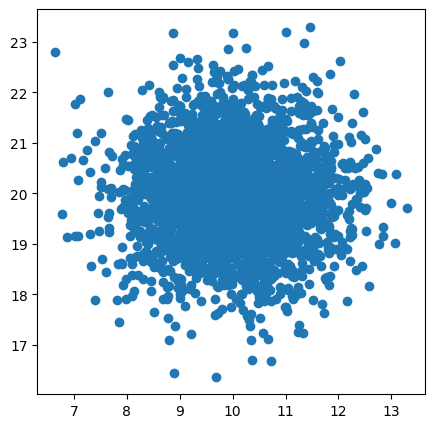

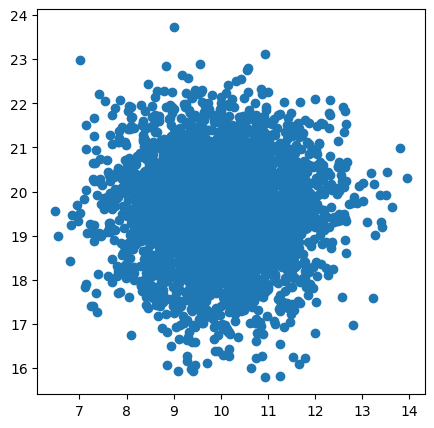

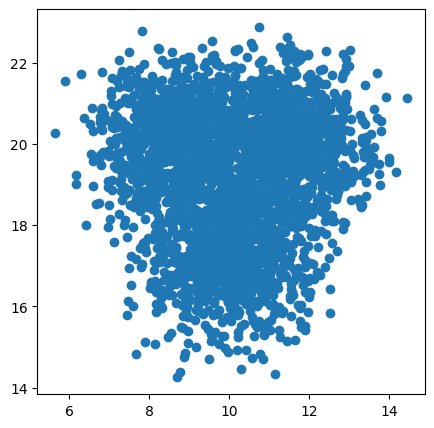

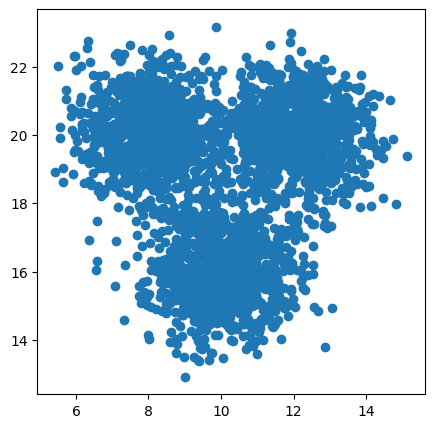

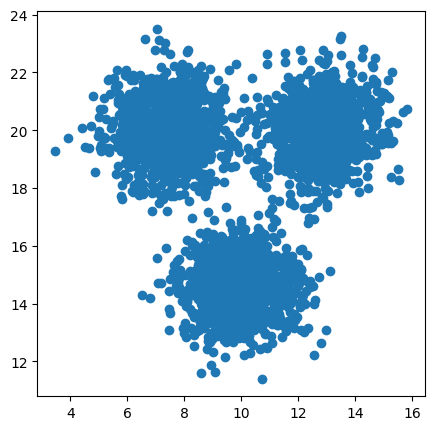

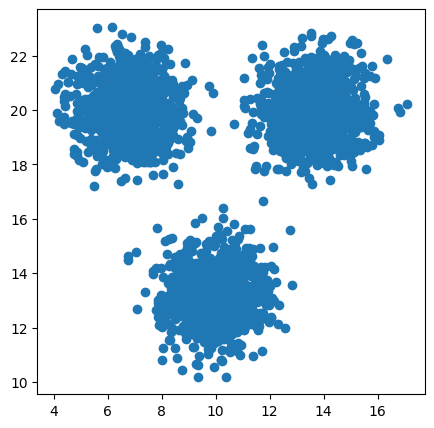

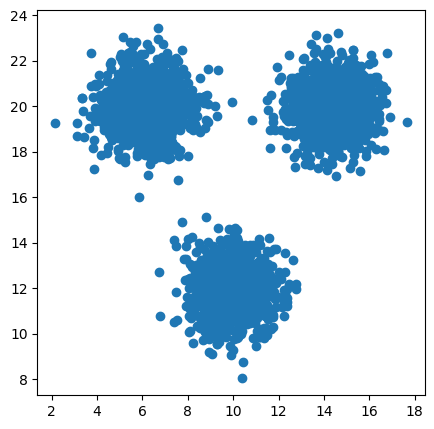

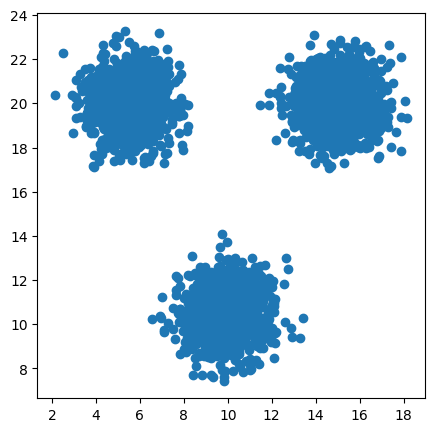

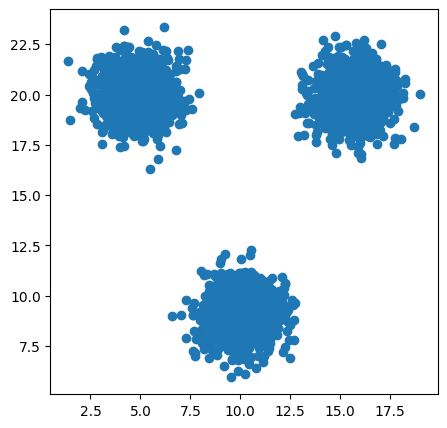

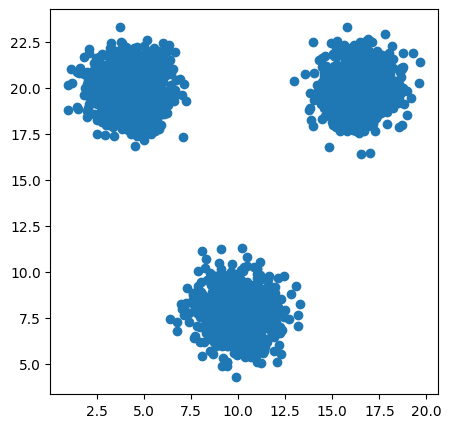

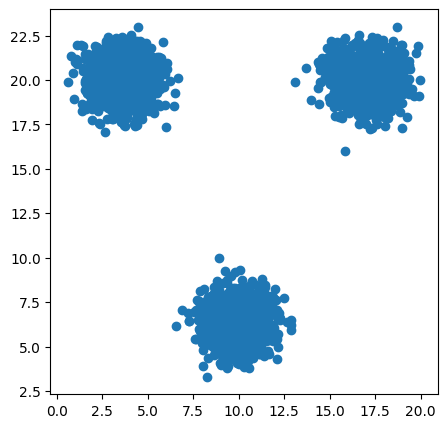

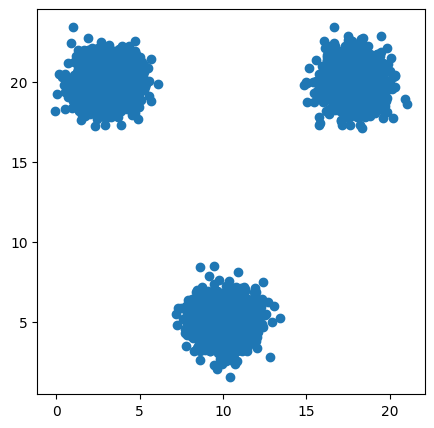

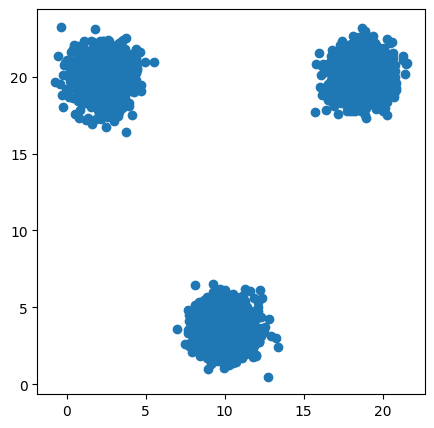

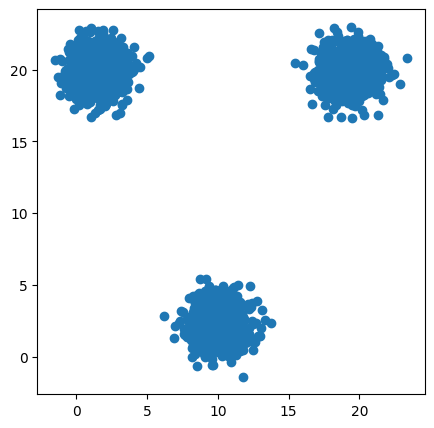

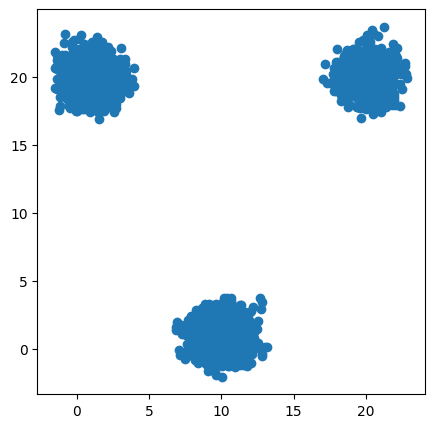

In [14]:
N_samples=3000
covs = [np.eye(2)]*3
corrs = []
for mus in zip(mus1,mus2,mus3):
    samples = samples_from_multivariate_multimodal_gaussian(mus, covs, N_samples)
    plt.figure(figsize=(5,5))
    plt.scatter(samples[:,0],samples[:,1])
    corrs.append(np.corrcoef(samples[:,0],samples[:,1]))

In [15]:
corrs

[array([[ 1.        , -0.00668835],
        [-0.00668835,  1.        ]]),
 array([[ 1.        , -0.00315916],
        [-0.00315916,  1.        ]]),
 array([[1.        , 0.01784948],
        [0.01784948, 1.        ]]),
 array([[ 1.        , -0.00278506],
        [-0.00278506,  1.        ]]),
 array([[1.        , 0.02960538],
        [0.02960538, 1.        ]]),
 array([[1.        , 0.03878213],
        [0.03878213, 1.        ]]),
 array([[1.        , 0.01532465],
        [0.01532465, 1.        ]]),
 array([[1.       , 0.0548385],
        [0.0548385, 1.       ]]),
 array([[1.        , 0.01667257],
        [0.01667257, 1.        ]]),
 array([[1.        , 0.02496154],
        [0.02496154, 1.        ]]),
 array([[1.        , 0.02766941],
        [0.02766941, 1.        ]]),
 array([[1.        , 0.01575939],
        [0.01575939, 1.        ]]),
 array([[1.        , 0.02195334],
        [0.02195334, 1.        ]]),
 array([[1.        , 0.02683083],
        [0.02683083, 1.        ]]),
 array([[1. 

In [26]:
min_pt, mid_pt, max_pt = 1., 10., 20.
n_dists = 15
mus1 = np.linspace(mid_pt,max_pt,n_dists)
mus1 = list(zip(mus1,np.full(len(mus1), max_pt)))
mus2 = np.linspace(mid_pt,min_pt,n_dists)
mus2 = list(zip(mus2,np.full(len(mus2), max_pt)))
mus3 = np.linspace(max_pt,min_pt,n_dists)
mus3 = list(zip(np.full(len(mus3), mid_pt),mus3))

In [27]:
configs_multimod = {f'mu ({mus[0][0]:0.2f},{mus[0][1]:0.2f}),({mus[1][0]:0.2f},{mus[1][1]:0.2f}),({mus[2][0]:0.2f},{mus[2][1]:0.2f})' : mus for mus in zip(mus1,mus2,mus3)}

In [28]:
configs_multimod

{'mu (10.00,20.00),(10.00,20.00),(10.00,20.00)': ((10.0, 20.0),
  (10.0, 20.0),
  (10.0, 20.0)),
 'mu (10.71,20.00),(9.36,20.00),(10.00,18.64)': ((10.714285714285714, 20.0),
  (9.357142857142858, 20.0),
  (10.0, 18.642857142857142)),
 'mu (11.43,20.00),(8.71,20.00),(10.00,17.29)': ((11.428571428571429, 20.0),
  (8.714285714285714, 20.0),
  (10.0, 17.285714285714285)),
 'mu (12.14,20.00),(8.07,20.00),(10.00,15.93)': ((12.142857142857142, 20.0),
  (8.071428571428571, 20.0),
  (10.0, 15.928571428571429)),
 'mu (12.86,20.00),(7.43,20.00),(10.00,14.57)': ((12.857142857142858, 20.0),
  (7.428571428571429, 20.0),
  (10.0, 14.571428571428571)),
 'mu (13.57,20.00),(6.79,20.00),(10.00,13.21)': ((13.571428571428571, 20.0),
  (6.785714285714286, 20.0),
  (10.0, 13.214285714285714)),
 'mu (14.29,20.00),(6.14,20.00),(10.00,11.86)': ((14.285714285714285, 20.0),
  (6.142857142857142, 20.0),
  (10.0, 11.857142857142858)),
 'mu (15.00,20.00),(5.50,20.00),(10.00,10.50)': ((15.0, 20.0),
  (5.5, 20.0),
  (

In [31]:
list(configs_multimod.values())[1]

((10.714285714285714, 20.0),
 (9.357142857142858, 20.0),
 (10.0, 18.642857142857142))

In [19]:
mus[0]

(20.0, 20.0)

In [25]:
f'mu {*ll[0][0]:(0.2f,0.2f)}'

SyntaxError: f-string: cannot use starred expression here (1863176268.py, line 1)

In [33]:
np.arange(1,5)

array([1, 2, 3, 4])